In [173]:
import pandas as pd
from IPython.display import Javascript
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
%matplotlib inline

import math
def roundup(x):
  return int(math.ceil(x / 100.0)) * 100
def rounddown(x):
  return int(math.floor(x / 100.0)) * 100

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Exploration
Exploration of the LAA dataset. Number of slices distribution

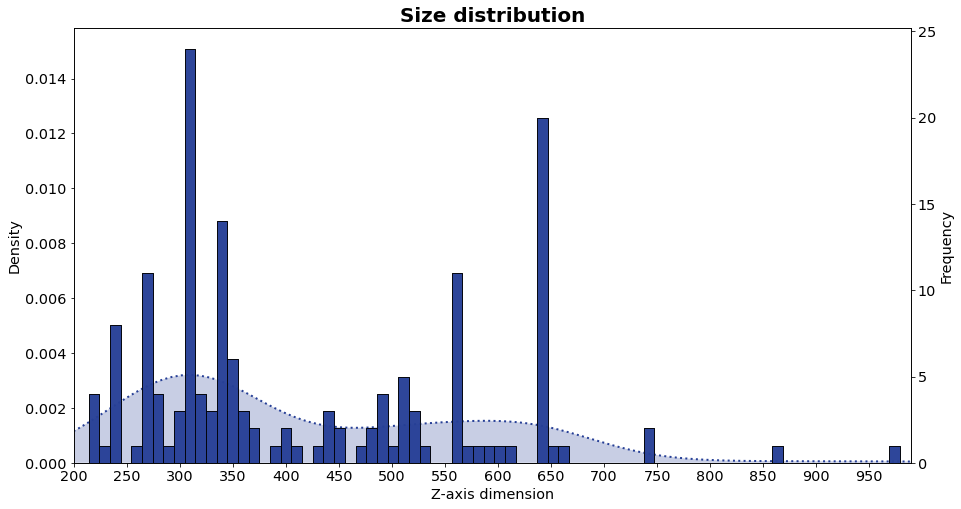

In [174]:
dark_blue = "#263f96"
light_blue= '#43B0F1'
lighter_blue = '#c8d9ed'
light_red= '#D43790'
light_orange = '#F79862'
red ='#EA1313'

pd.set_option('precision', 4)

params = {'legend.fontsize': 'x-large',          
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
#'figure.figsize': (28,11),         
pd.set_option('display.max_rows', 200)         
plt.rcParams.update(params)


figures_data = pd.read_csv('/content/drive/My Drive/TFM/Data_models_TFM/LAA/Figure_variation_forhist.csv')
fig, ax1 = plt.subplots(figsize = (15,8))
# sns.distplot( x= 'frequency', y = 'value', data =figures_data, orient ='h' ,palette="Blues_d")
bins_num = set(figures_data["value"])
ax2 = ax1.twinx()

sns.distplot(figures_data["value"], kde=False,rug=False,norm_hist=False, bins= len(bins_num),ax = ax2,
               rug_kws={"color": "#057DCD","linewidth": 2,"height":0.03},vertical=False,
               kde_kws={"color": dark_blue , "lw": 2,"linestyle" : ':',"shade": True},
               hist_kws={"histtype": "barstacked", "linewidth": 1,"alpha": 0.8, "color": dark_blue, 'edgecolor':'k'})

sns.distplot(figures_data["value"], kde=True,rug=False,norm_hist=False, bins= len(bins_num),ax = ax1,
               rug_kws={"color": "#057DCD","linewidth": 2,"height":0.03},vertical=False,
               kde_kws={"color": dark_blue , "lw": 2,"linestyle" : ':',"shade": True},
               hist_kws={"histtype": "barstacked", "linewidth": 1,"alpha": 0.8, "color": dark_blue, 'edgecolor':'k'})

ax2.set_title('Size distribution',fontweight='bold',fontsize = 20);
ax2.set(xlim=(figures_data.value.min()-10, figures_data.value.max()+10))
ax2.set_xlabel('Z-axis dimension')
ax1.set_xlabel('Z-axis dimension')

ax2.set_ylabel('Frequency')
ax1.set_ylabel('Density')
ax2.xaxis.set_ticks(np.arange(rounddown(figures_data.value.min()), roundup(figures_data.value.max()), 50))
ax1.xaxis.set_ticks(np.arange(rounddown(figures_data.value.min()), roundup(figures_data.value.max()), 50));


## Current State of the Networks

Display the current state of the networks. Info is extracted from the stat.json that the Networks regularly update. Weighted update is a dummy plot that just takes into account the overall performance of the network:

- __Score:__ How well the agent is doing during the evaluation. Considers distance to the target landmark and also the time required to do so.
- __Succes ratio:__ Wether the agent was able to find the landmark before reaching the maximum number of frames allowed
- __Mean distance :__ The mean distance to the landmark achieved. 
- __Max distance:__ The maximum distance to the landmark achieved. 

In [206]:

lm_names = ['Circumflex','Landing Zone', 'Ostium']
models_names = {0:['default','spacing4','ND_default'],
                1:['default','ND_default'],    
                2:['default','ND_default']}

num = 0 # Landmark number
indx = 1 # Number of try
windowsize = 10
centered = True
filepath = f'/content/drive/My Drive/TFM/Data_models_TFM/LAA/LM_{num:02d}/{models_names[num][indx]}/stats.json'

print(filepath)
data = pd.read_json(path_or_buf= filepath,orient='records') 

my_df = data[['epoch_num','n_success_ratio','mean_score','mean_distance','max_distance','global_step',
              'expreplay/mean_score',	'expreplay/max_score',	'expreplay/mean_dist',	'expreplay/max_dist','huber_loss/value','QueueInput/queue_size']].copy()

my_df['weighted_value'] = my_df.apply(lambda row: 100*row.n_success_ratio**2/((row.mean_distance*row.iloc[10])*(row.max_distance**2)), axis=1)

my_df['rolling_w_v'] = my_df['weighted_value'].rolling(window=windowsize, min_periods=windowsize//2,center=centered).mean()
my_df.set_index('epoch_num')
my_df.tail(10)

/content/drive/My Drive/TFM/Data_models_TFM/LAA/LM_00/spacing4/stats.json


,epoch_num,n_success_ratio,mean_score,mean_distance,max_distance,global_step,expreplay/mean_score,expreplay/max_score,expreplay/mean_dist,expreplay/max_dist,huber_loss/value,QueueInput/queue_size,weighted_value,rolling_w_v
39,40,0.8332,51.6692,1.1092,1.7544,1000000,63.6966,158.9939,1.6745,114.6816,0.0745,1.2566,272.8088,436.1505
40,41,0.8532,NaN,NaN,NaN,1025000,64.2091,188.0986,1.6292,77.5839,0.0600,0.4114,NaN,436.1505
41,42,0.8491,48.0576,0.9862,1.7388,1050000,63.5123,163.0918,1.5705,35.4408,0.0579,0.2600,417.3383,434.2026
42,43,0.8148,NaN,NaN,NaN,1075000,64.5004,172.1604,1.7049,147.5843,0.0613,0.7699,NaN,434.2026
43,44,0.8638,51.5823,1.2729,2.0350,1100000,64.5716,177.0256,1.5401,82.7446,0.0665,0.0320,212.9246,409.9981
44,45,0.8620,NaN,NaN,NaN,1125000,63.5074,167.2898,1.7869,125.9622,0.0729,1.0826,NaN,409.9981
45,46,0.8437,48.5372,1.4286,1.9480,1150000,63.1555,178.0504,1.7106,120.2187,0.0653,1.0196,201.1179,NaN
46,47,0.8454,NaN,NaN,NaN,1175000,63.5947,182.1899,1.6354,103.5325,0.0627,0.5872,NaN,NaN
47,48,0.8502,45.4491,0.9229,1.2738,1200000,65.1795,169.3334,1.6025,63.0151,0.0510,0.5678,945.8008,NaN
48,49,0.8580,NaN,NaN,NaN,1225000,64.7591,171.3206,1.5058,44.3541,0.0548,0.5025,NaN,NaN


<IPython.core.display.Javascript object>

Current best: 00_spacing4_01_model-950000.csv


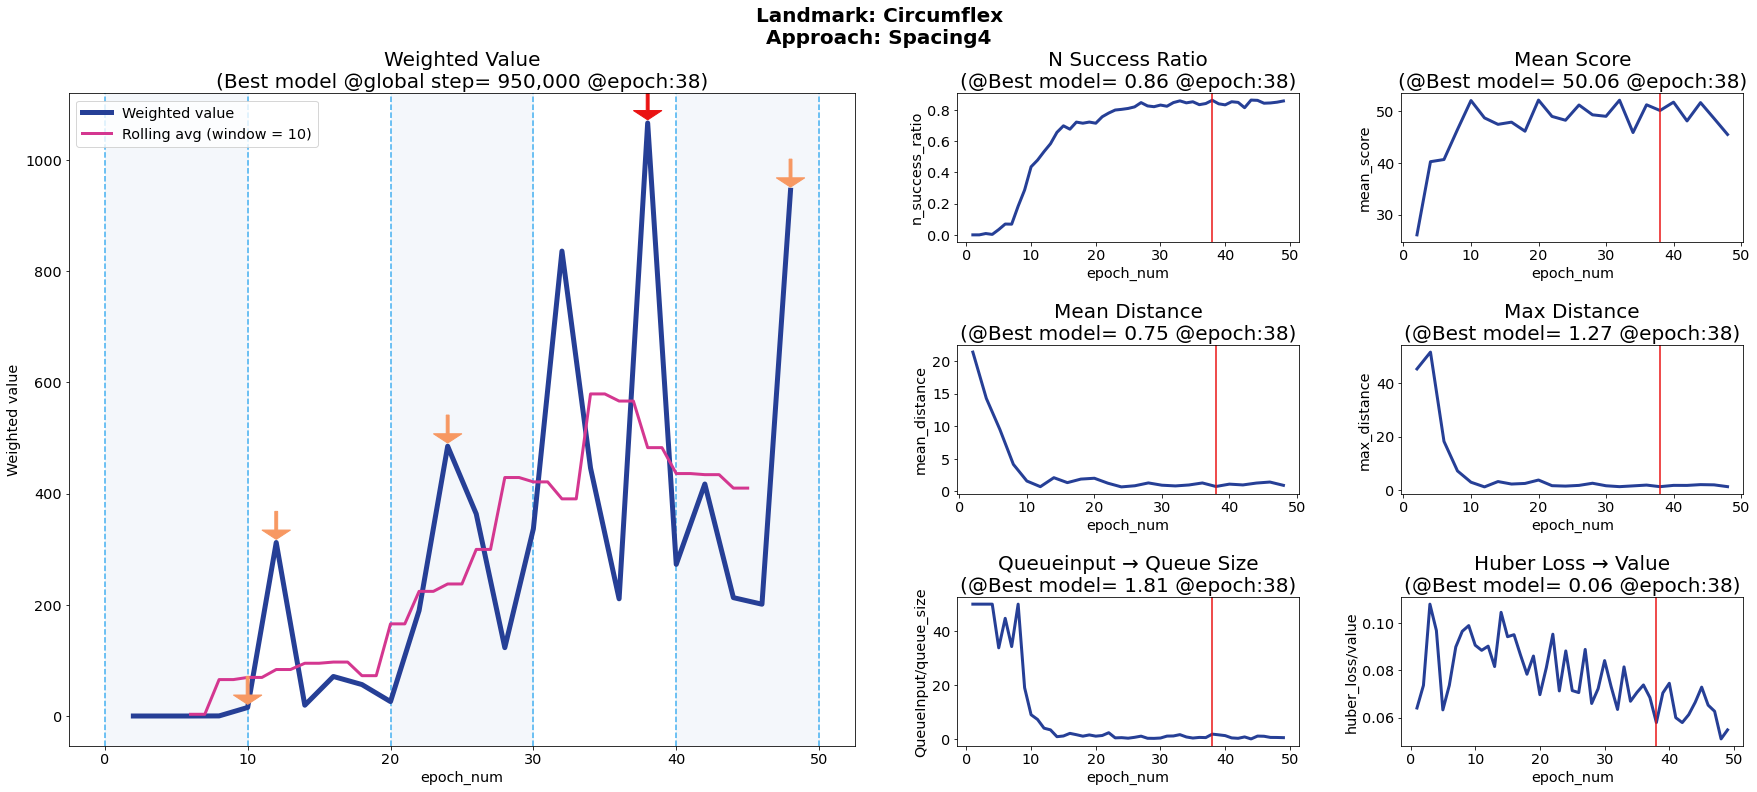

In [207]:
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'''))

#Setting the subplot
fig = plt.figure(figsize = (30,12))
grid = plt.GridSpec(3, 4, hspace=.7, wspace=0.3)
arrow_symb = " "+u"\u2192"+" " 
multiax = fig.add_subplot(grid[:, :2])
ax1 = fig.add_subplot(grid[0, 2])
ax2 = fig.add_subplot(grid[0, 3])
ax3 = fig.add_subplot(grid[1, 2])
ax4 = fig.add_subplot(grid[1, 3])
ax5 = fig.add_subplot(grid[2, 2])
ax6 = fig.add_subplot(grid[2, 3])

best_mod = my_df.iloc[my_df['weighted_value'].argmax(),:] #choose best model 
columns_to_plot = ["weighted_value","n_success_ratio" ,"mean_score","mean_distance","max_distance","QueueInput/queue_size","huber_loss/value"]
group_of_best = []
current_max = np.NINF

for i, ax in enumerate(plt.gcf().get_axes()):
  if i == 0: # first plot is different
    n_group=10
    df_max = my_df.groupby(np.arange(len(my_df.index)) // n_group)[['weighted_value']].agg(['min', 'max','idxmax'])#group i
    if len(my_df)%n_group == 1:
      df_max.drop(df_max.tail(1).index,inplace=True)
      df_max.iloc[:,2] = df_max.iloc[:,2].astype('int64')
          
    wgth = sns.lineplot(x="epoch_num", y=columns_to_plot[i], data=my_df,ax= ax,color = dark_blue, zorder = -5, linewidth = 5,label = f'Weighted value')
    mvavg = sns.lineplot(x="epoch_num", y="rolling_w_v", data=my_df,ax= ax,
             color = light_red,linewidth = 3, zorder = -4,linestyle ='--',
             label =f'Rolling avg (window = {windowsize})').set_title(f"Weighted Value\n(Best model @global step= {best_mod.global_step:,.0f} @epoch:{best_mod.epoch_num:.0f})", fontsize=20)
    ax.set(ylabel='Weighted value')

    for id_now, max_index in enumerate(df_max.iloc[:,2]):

      if my_df.weighted_value[max_index] > 0.85*current_max:
      #if my_df.weighted_value[max_index] > 1.1*my_df.rolling_w_v[max_index]:
        
        group_of_best.append(max_index)

        offset = .05*ax.get_ylim()[1]
        if max_index != my_df['weighted_value'].idxmax():
          arrow_reg = ax.arrow(max_index+1, my_df.weighted_value[max_index]+offset, 0,-offset*0.9,
                          fc=light_orange, ec=light_orange, alpha=1, width=.2,label='Region maximum',
                          head_width=2, head_length=offset*0.3,zorder = -3,overhang = 0,length_includes_head = True)
        else:
          arrow_max = ax.arrow(max_index+1, my_df.weighted_value[max_index]+offset, 0,-offset*0.9,
                           fc=red, ec=red, alpha=1, width=.2,head_width=2,label='Global maximum', 
                           head_length=offset*0.3,zorder = -3,overhang = 0,length_includes_head = True)
      
      current_max = my_df.weighted_value[max_index]

      if id_now%2 != 1:
        mythresh =  (max_index//n_group)*n_group
        ax.axvline(mythresh,color=light_blue,linestyle ='--',linewidth = 1.5,zorder = -8)
        ax.axvline(mythresh + n_group,color=light_blue,linestyle ='--',linewidth = 1.5,zorder = -8)
        ax.axvspan( mythresh,mythresh + n_group, color= lighter_blue, alpha = 0.2,zorder = -10)
        
  else:
    sns.lineplot(x="epoch_num", y=columns_to_plot[i]  ,data=my_df,ax=ax,
              color = dark_blue,
              linewidth = 3).set_title(f'{columns_to_plot[i].replace("_", " ").replace("/",arrow_symb).title()}\n(@Best model= {best_mod.loc[columns_to_plot[i]]:.2f} @epoch:{best_mod.epoch_num:.0f})', fontsize=20)  
    ax.axvline(best_mod.epoch_num,color=red,linewidth = 1.5)

multiax.legend()
best_name = f"{num:02d}_{models_names[num][indx]}_{indx:02d}_model-{my_df.iloc[my_df['weighted_value'].idxmax,:].global_step.item():.0f}.csv"
best_reg_names = [f"{num:02d}_{models_names[num][indx]}_{indx:02d}_model-{my_df.iloc[reg_ind,:].global_step.item():.0f}.csv" for reg_ind in group_of_best ]
print(f'Current best: {best_name}')
my_df.iloc[group_of_best].sort_values(by='weighted_value',ascending=False)
fig.suptitle(f'Landmark: {lm_names[num]}\nApproach: {models_names[num][indx].capitalize()}',fontweight='bold',fontsize = 20);

In [208]:
best_reg_names

['00_spacing4_01_model-250000.csv',
 '00_spacing4_01_model-300000.csv',
 '00_spacing4_01_model-600000.csv',
 '00_spacing4_01_model-950000.csv',
 '00_spacing4_01_model-1200000.csv']

## Validation results of the different models chosen from training:

<IPython.core.display.Javascript object>

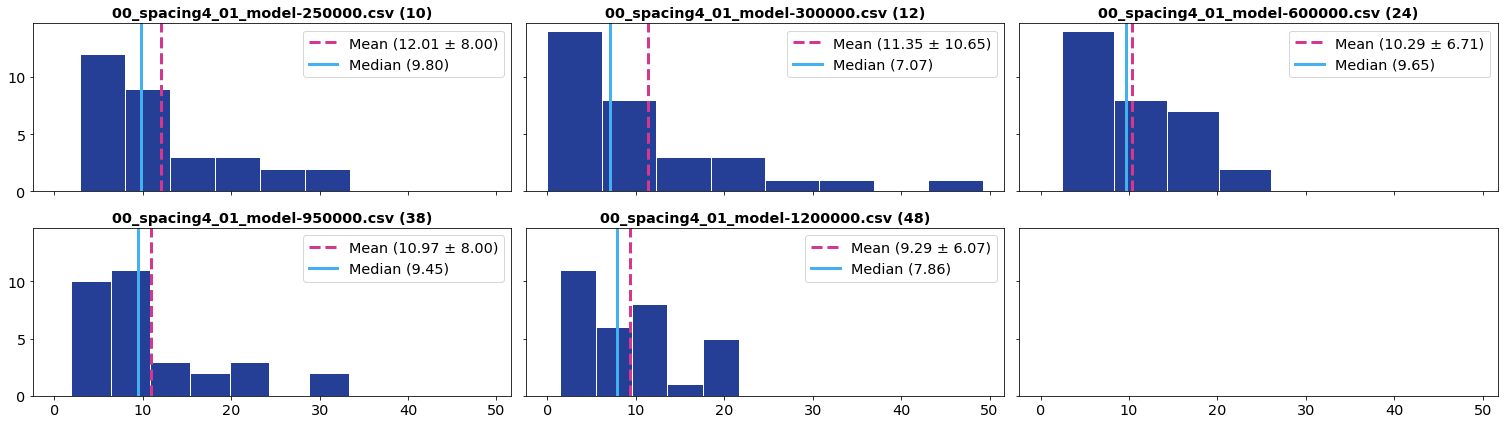

In [210]:
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'''))

logs = {0:[['00_default_00_model-250000.csv',
            '00_default_00_model-350000.csv',
            '00_default_00_model-700000.csv',
            '00_default_00_model-1250000.csv',
            '00_default_00_model-1500000.csv'],
           
           ['00_spacing4_01_model-250000.csv',
            '00_spacing4_01_model-300000.csv',
            '00_spacing4_01_model-600000.csv',
            '00_spacing4_01_model-950000.csv',
            '00_spacing4_01_model-1200000.csv'],
           
           ['00_ND_default_02_model-200000.csv',
            '00_ND_default_02_model-400000.csv',
            '00_ND_default_02_model-650000.csv']
            ],
               
        1:[['01_default_00_model-250000.csv',
            '01_default_00_model-450000.csv',
            '01_default_00_model-500000.csv',
            '01_default_00_model-700000.csv',
            '01_default_00_model-750000.csv',
            '01_default_00_model-850000.csv',
            '01_default_00_model-1000000.csv',
            '01_default_00_model-1100000.csv'],
           
           ['01_ND_default_01_model-250000.csv',
            '01_ND_default_01_model-500000.csv',
            '01_ND_default_01_model-650000.csv',
            '01_ND_default_01_model-1000000.csv',
            '01_ND_default_01_model-1150000.csv',
            '01_ND_default_01_model-1450000.csv',
            '01_ND_default_01_model-1700000.csv',
            '01_ND_default_01_model-1800000.csv']
           ],


        2:[[ '02_default_00_model-250000.csv',
             '02_default_00_model-400000.csv',
            '02_default_00_model-500000.csv',
             '02_default_00_model-550000.csv',
             '02_default_00_model-1000000.csv',
             '02_default_00_model-1100000.csv',
            '02_default_00_model-1250000.csv',
             '02_default_00_model-1350000.csv',
            '02_default_00_model-1450000.csv',
             '02_default_00_model-1550000.csv',
            '02_default_00_model-1700000.csv',
             '02_default_00_model-1750000.csv',
             '02_default_00_model-1850000.csv',
            '02_default_00_model-1950000.csv',
             '02_default_00_model-2100000.csv'],
           
           ['02_ND_default_01_model-250000.csv',
            '02_ND_default_01_model-500000.csv',
            '02_ND_default_01_model-750000.csv',
            '02_ND_default_01_model-900000.csv',
            '02_ND_default_01_model-1100000.csv',
            '02_ND_default_01_model-1400000.csv',
            '02_ND_default_01_model-1700000.csv']
           ]
        }

log_names = logs[num][indx]

columns_num = 3
height_box = int(np.ceil(len(log_names)/columns_num))
figsize = (7*columns_num,min(3*height_box,16))

fig, (axes) = plt.subplots(height_box,columns_num,sharey=True, sharex=True,figsize = figsize )
ax_hist = axes.flat
results = []

barcolor = dark_blue
medcolor= light_blue
meancolor= light_red
logs_filepath = '/content/drive/My Drive/TFM/Data_models_TFM/LAA/Logs/'
dict_results = {}

# Reading the logs:
for it, log_name in enumerate(log_names):
  
  epoch_num = ((int)(log_name.split('-')[1].split('.')[0]))//25000

  results.append(pd.read_csv(logs_filepath+log_name))
  results[it].set_index('idx_num')
  model_mean = results[it]['distance_error'].mean()
  model_std = results[it]['distance_error'].std()
  model_median = results[it]['distance_error'].median()
  model_mean_score = results[it]['score'].median()
  model_max_dist = results[it]['distance_error'].max() 
  dict_results[f"{epoch_num}"] = [model_mean,model_std,model_median,model_mean_score,model_max_dist]
  
  #Distribution Plot
  sns.distplot(results[it]['distance_error'], ax=ax_hist[it],kde=False,rug=False,norm_hist=False,
               rug_kws={"color": "#057DCD","linewidth": 2,"height":0.03},
               hist_kws={"histtype": "barstacked", "linewidth": 1, "rwidth":None,
                            "alpha": 1, "color": barcolor, 'edgecolor':"#FFFFFF"}).set_title( log_name + f' ({epoch_num})' ,fontweight='bold')
  ax_hist[it].axvline(model_mean, color=meancolor, linestyle='--',linewidth = 3,label= f'Mean ({model_mean:.2f} \xb1 {model_std:.2f})')
  ax_hist[it].axvline(model_median, color=medcolor, linestyle='-',linewidth = 3,label= f'Median ({model_median:.2f})')
  ax_hist[it].legend()
  ax_hist[it].set(xlabel='')

fig.tight_layout()
plt.show()

,epoch_num,mean_distance,dist_std,dist_median,mean_score,max_distance,weighted_value,cv,esp
0,10,12.0124,8.0032,9.7956,43.6036,33.4414,0.0249,0.6662,274.4610
1,12,11.3504,10.6493,7.0677,34.0754,49.2253,0.0179,0.9382,230.7532
2,24,10.2898,6.7079,9.6540,49.7508,26.1100,0.0372,0.6519,228.8552
3,38,10.9698,7.9977,9.4536,49.5522,33.2765,0.0274,0.7291,254.9176
4,48,9.2866,6.0738,7.8565,43.0158,21.6295,0.0498,0.6540,168.3996


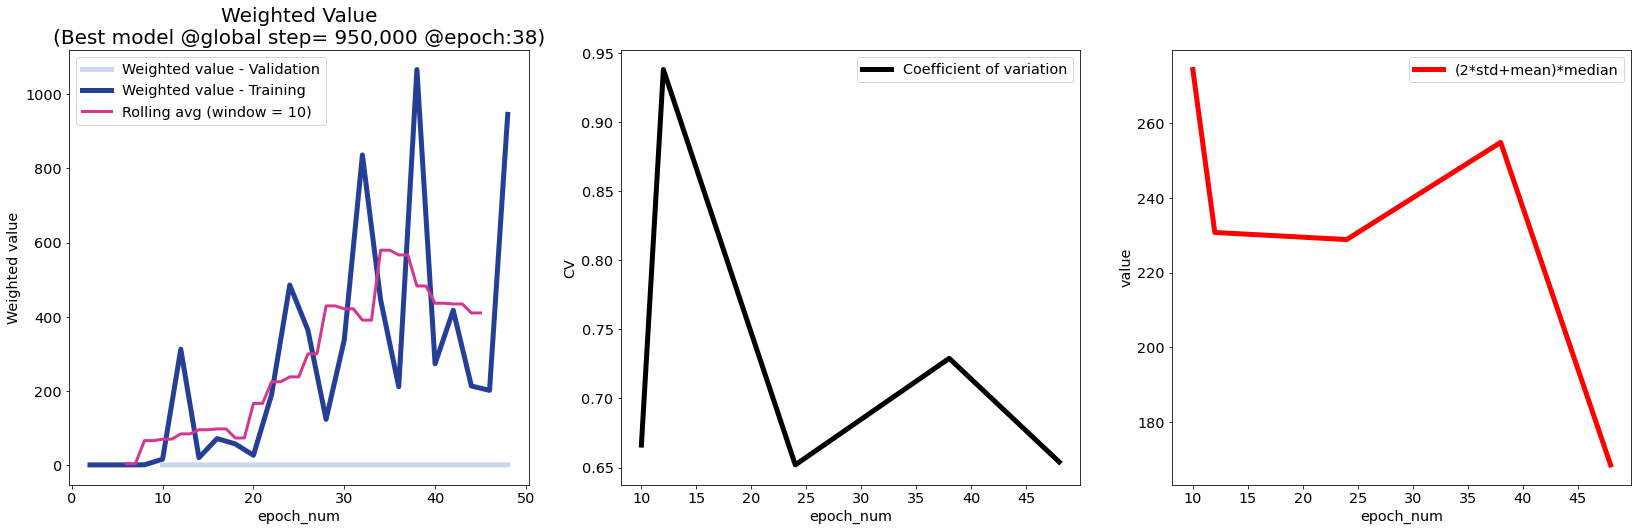

In [211]:
validation_results = pd.DataFrame.from_dict(dict_results,orient='index', columns=['mean_distance', 'dist_std','dist_median','mean_score','max_distance'])
validation_results['weighted_value'] =  validation_results.apply(lambda row: \
                                      10/((row.mean_distance)*(row.max_distance)), axis=1)
validation_results['cv'] = validation_results.apply(lambda row: (row.dist_std/row.mean_distance), axis=1)
validation_results['esp'] = validation_results.apply(lambda row: ((2*row.dist_std+row.mean_distance)*row.dist_median), axis=1)
validation_results.index.name = "epoch_num"
validation_results= validation_results.reset_index().astype({'epoch_num': 'int64'})

fig, (ax,ax_pres,ax_esp) = plt.subplots(1,3,figsize = (28,8) )
sns.lineplot(data=validation_results,x="epoch_num",y="weighted_value",ax= ax,color = lighter_blue, zorder = -3, linewidth = 5,label = f'Weighted value - Validation')
sns.lineplot(x="epoch_num", y="weighted_value", data=my_df,ax= ax,color = dark_blue, zorder = -5, linewidth = 5,label = f'Weighted value - Training')
sns.lineplot(x="epoch_num", y="rolling_w_v", data=my_df,ax= ax,
          color = light_red,linewidth = 3, zorder = -4,linestyle ='--',
          label =f'Rolling avg (window = {windowsize})').set_title(f"Weighted Value\n(Best model @global step= {best_mod.global_step:,.0f} @epoch:{best_mod.epoch_num:.0f})", fontsize=20)
ax.set(ylabel='Weighted value')


sns.lineplot(data=validation_results,x="epoch_num",y="cv",ax= ax_pres,color = 'k', zorder = -3, linewidth = 5,label = f'Coefficient of variation')
ax_pres.set(ylabel='CV')
sns.lineplot(data=validation_results,x="epoch_num",y="esp",ax= ax_esp,color = 'r', zorder = -3, linewidth = 5,label = f'(2*std+mean)*median')
ax_esp.set(ylabel='value')
validation_results

Number of errors =  9 (29.03%)


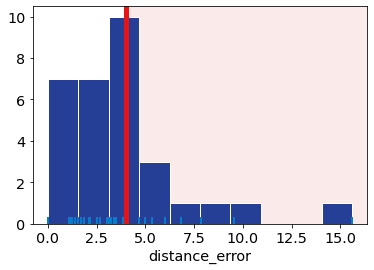

In [35]:
treshold = 4
df_num = -1

errors = results[df_num].loc[results[df_num]['distance_error'] > treshold,:].sort_values(by='distance_error',ascending = False)
hist_ax= sns.distplot(results[df_num]['distance_error'],kde=False,rug=True,norm_hist=False,
               rug_kws={"color": "#057DCD","linewidth": 2,"height":0.03},
               hist_kws={"histtype": "barstacked", "linewidth": 1,
                            "alpha": 1, "color": barcolor, 'edgecolor':"#FFFFFF"})
hist_ax.axvline(treshold,color = '#EA1313',linewidth = 5)
xlim = hist_ax.get_xlim()
hist_ax.axvspan(treshold, xlim[-1], color='#EF9A9A', alpha=0.2,zorder = -10)
hist_ax.set_xlim(xlim)

print('Number of errors = ', errors.distance_error.size,f'({errors.distance_error.size/results[df_num].distance_error.size:.2%})' )

In [136]:
errors.sort_values(by='distance_error',ascending=True)

,idx_num,filename,score,distance_error,final_coordinates_x,final_coordinates_y,final_coordinates_z,target_x,target_y,target_z,spacing_x,spacing_y,spacing_z
22,23,Bordeaux_Case96,33.9375,4.1150,133,142,198,137,139,202,0.8477,0.8477,0.5000
15,16,Bordeaux_Case28,77.3267,4.7024,125,140,214,127,135,219,0.8398,0.8398,0.3885
27,28,denmark_A6,73.5632,4.8015,123,138,197,120,140,204,0.8580,0.8580,0.5246
21,22,Bordeaux_Case93,69.2891,5.1608,126,157,199,122,161,193,0.8398,0.8398,0.5000
12,13,Bordeaux_Case204,76.1630,6.1805,156,143,211,152,138,220,0.7266,0.7266,0.5000
25,26,denmark_A19,77.8304,6.5522,148,136,251,150,130,258,0.8580,0.8580,0.5246
24,25,denmark_A11,26.4024,6.6180,147,141,207,154,144,205,0.8580,0.8580,0.5246
7,8,Bordeaux_Case163,62.7876,7.7912,129,123,205,127,120,219,0.7031,0.7031,0.5262
29,30,denmark_W9,6.9831,10.4872,141,145,217,148,151,202,0.8580,0.8580,0.4590
20,21,Bordeaux_Case7,14.2278,10.5187,144,169,158,130,160,158,0.6523,0.6523,0.3885


# [VALIDATION] Final Results

In [ ]:
#Add something to compute from all models

In [188]:
pd.read_csv(logs_filepath+'landmark_1_test_model-1100000.csv').distance_error.mean()


6.217628099373092

,N,Mínimo,Máximo,Media,Desv. típ.,mean + 2*sD,mean - 2*sD
Landmark,,,,,,,
1,31,2.2044,26.6732,8.4451,6.2638,-4.0825,20.9728
2,31,0.9180,12.6228,5.2447,3.3342,-1.4237,11.9132
3,31,0.6523,7.7076,3.5215,1.9916,-0.4618,7.5048


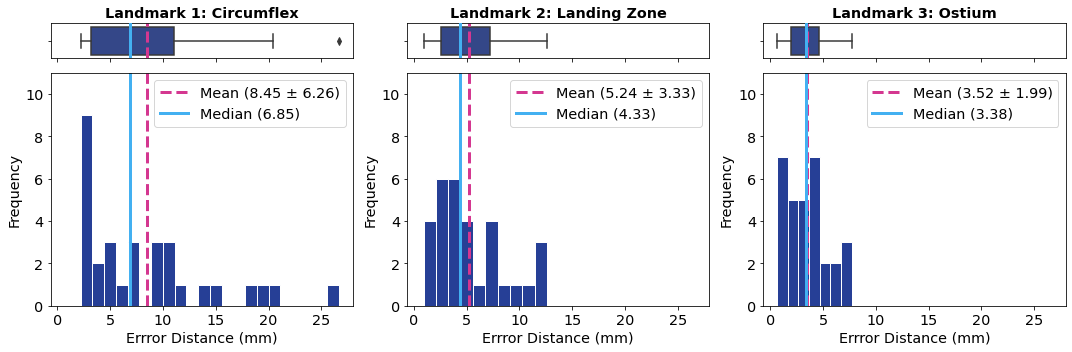

In [192]:
dict_best = {0:'00_ND_default_02_model-200000.csv',1:'01_ND_default_01_model-1000000.csv',2:'02_ND_default_01_model-750000.csv'}

columns =['Landmark','N','Mínimo','Máximo','Media','Desv. típ.']
performance = pd.DataFrame(columns =columns)
numcol = 3
fig, (axes) = plt.subplots(ncols=numcol, nrows=2,sharex=True, gridspec_kw= {"height_ratios": [0.15, 1] },figsize = (15,5))
axes= axes.flat
results = []
barcolor = "#263f96"
medcolor= '#43B0F1'
meancolor= '#D43790'
count =0
bins_val = [22,10,7]

for lm_ind, log_name in dict_best.items():

  results.append(pd.read_csv(logs_filepath+log_name))
  results[lm_ind].set_index('idx_num')
  mean = results[lm_ind]['distance_error'].mean()
  std = results[lm_ind]['distance_error'].std()
  median=results[lm_ind]['distance_error'].median()
  max_dist = results[lm_ind]['distance_error'].max()
  min_dist = results[lm_ind]['distance_error'].min()
  to_append = pd.DataFrame( {'Landmark':[lm_ind+1],'N':[len(results[lm_ind].index)],'Mínimo':[min_dist],'Máximo':[max_dist],'Media':[mean],'Desv. típ.':[std]})  
  performance = performance.append(to_append)

  axes[lm_ind+count].axvline(median, color=medcolor,linewidth = 3, linestyle='-',zorder = 10)
  axes[lm_ind+count].axvline(mean, color=meancolor,linewidth = 3, linestyle='--')    
  sns.boxplot(results[lm_ind]['distance_error'], ax=axes[lm_ind+count], color =barcolor)
  axes[lm_ind+count].set(xlabel='')
  axes[lm_ind+count].set_title( f"Landmark {lm_ind+1}: {lm_names[lm_ind]}"  ,fontweight='bold')

  sns.distplot(results[lm_ind]['distance_error'], ax=axes[lm_ind+count+numcol],kde=False,rug=False,norm_hist=False,bins= bins_val[lm_ind],\
               rug_kws={"color": "#057DCD","linewidth": 2,"height":0.03},
               hist_kws={"histtype": "barstacked", "linewidth": 1,
                            "alpha": 1, "color": barcolor, 'edgecolor':"#FFFFFF"})
  axes[lm_ind+count+numcol].set(xlabel='Errror Distance (mm)', ylabel='Frequency')
  axes[lm_ind+count+numcol].axvline(mean, color=meancolor, linestyle='--',linewidth = 3,label= f'Mean ({mean:.2f} \xb1 {std:.2f})')
  axes[lm_ind+count+numcol].axvline(median, color=medcolor, linestyle='-',linewidth = 3,label= f'Median ({median:.2f})')
  axes[lm_ind+count+numcol].legend()
  axes[lm_ind+count+numcol].set(ylim=(0, 11))
  #count += 3*(lm_ind%2)
fig.tight_layout()
#Compute table values
def f1(x):
  return x[4] + 2*x[5] 
def f2(x):
  return x[4] - 2*x[5]
performance['mean + 2*sD'] = performance.apply(f2 , axis=1)
performance['mean - 2*sD'] = performance.apply(f1 , axis=1)
performance.set_index('Landmark', inplace=True)
performance

## [TESTING] Final Results

,N,Mínimo,Máximo,Media,Desv. típ.,mean + 2*sD,mean - 2*sD
Landmark,,,,,,,
1,16,0.9289,23.9812,12.3264,7.3419,-2.3575,27.0103
2,16,1.9548,8.9778,4.3188,2.2892,-0.2596,8.8973
3,16,0.4885,5.5759,2.9205,1.3426,0.2352,5.6058


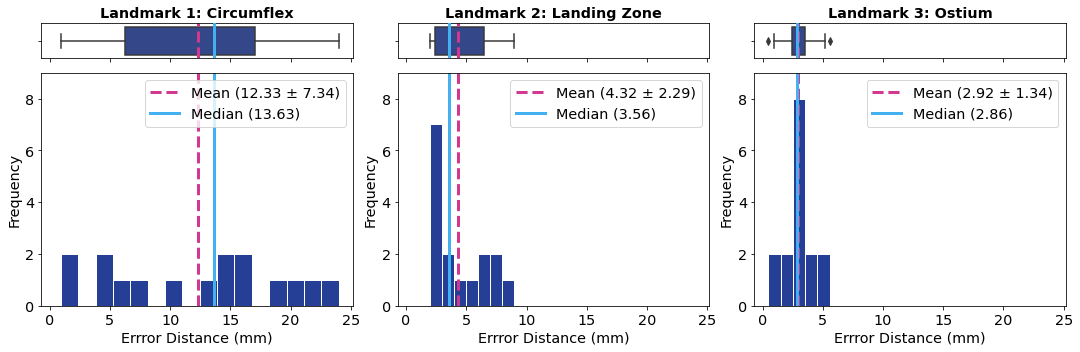

In [200]:
dict_best = {0:'landmark_0_test_model-200000.csv',1:'landmark_1_test_model-1000000.csv',2:'landmark_2_test_model-750000.csv'}

columns =['Landmark','N','Mínimo','Máximo','Media','Desv. típ.']
performance = pd.DataFrame(columns =columns)
numcol = 3
fig, (axes) = plt.subplots(ncols=numcol, nrows=2,sharex=True, gridspec_kw= {"height_ratios": [0.15, 1] },figsize = (15,5))
axes= axes.flat
results = []
barcolor = "#263f96"
medcolor= '#43B0F1'
meancolor= '#D43790'
count =0
bins_val = [16,7,5]

for lm_ind, log_name in dict_best.items():

  results.append(pd.read_csv(logs_filepath+log_name))
  results[lm_ind].set_index('idx_num')
  mean = results[lm_ind]['distance_error'].mean()
  std = results[lm_ind]['distance_error'].std()
  median=results[lm_ind]['distance_error'].median()
  max_dist = results[lm_ind]['distance_error'].max()
  min_dist = results[lm_ind]['distance_error'].min()
  to_append = pd.DataFrame( {'Landmark':[lm_ind+1],'N':[len(results[lm_ind].index)],'Mínimo':[min_dist],'Máximo':[max_dist],'Media':[mean],'Desv. típ.':[std]})  
  performance = performance.append(to_append)

  axes[lm_ind+count].axvline(median, color=medcolor,linewidth = 3, linestyle='-',zorder = 10)
  axes[lm_ind+count].axvline(mean, color=meancolor,linewidth = 3, linestyle='--')    
  sns.boxplot(results[lm_ind]['distance_error'], ax=axes[lm_ind+count], color =barcolor)
  axes[lm_ind+count].set(xlabel='')
  axes[lm_ind+count].set_title( f"Landmark {lm_ind+1}: {lm_names[lm_ind]}"  ,fontweight='bold')

  sns.distplot(results[lm_ind]['distance_error'], ax=axes[lm_ind+count+numcol],kde=False,rug=False,norm_hist=False,bins= bins_val[lm_ind],\
               rug_kws={"color": "#057DCD","linewidth": 2,"height":0.03},
               hist_kws={"histtype": "barstacked", "linewidth": 1,
                            "alpha": 1, "color": barcolor, 'edgecolor':"#FFFFFF"})
  axes[lm_ind+count+numcol].set(xlabel='Errror Distance (mm)', ylabel='Frequency')
  axes[lm_ind+count+numcol].axvline(mean, color=meancolor, linestyle='--',linewidth = 3,label= f'Mean ({mean:.2f} \xb1 {std:.2f})')
  axes[lm_ind+count+numcol].axvline(median, color=medcolor, linestyle='-',linewidth = 3,label= f'Median ({median:.2f})')
  axes[lm_ind+count+numcol].legend()
  axes[lm_ind+count+numcol].set(ylim=(0, 9))
  #count += 3*(lm_ind%2)
fig.tight_layout()
#Compute table values
def f1(x):
  return x[4] + 2*x[5] 
def f2(x):
  return x[4] - 2*x[5]
performance['mean + 2*sD'] = performance.apply(f2 , axis=1)
performance['mean - 2*sD'] = performance.apply(f1 , axis=1)
performance.set_index('Landmark', inplace=True)
performance

In [ ]:
distance_1 = '/content/drive/My Drive/TFM/Data_models_TFM/distance_lm1.txt'
distance_2 = '/content/drive/My Drive/TFM/Data_models_TFM/distance_lm2.txt'
distance_3 = '/content/drive/My Drive/TFM/Data_models_TFM/distance_lm3.txt'
distance_4 = '/content/drive/My Drive/TFM/Data_models_TFM/distance_lm4.txt'

d1_df = pd.read_csv(distance_1, sep=" - ", header=None,engine='python')
d1_df.columns = ["name", "score", "disterror", "final_loc"]
d1_df = d1_df.loc[:,["name","disterror"]]
d1_df["landmark"] = '(1) STJ'
d1_df["Source"] = 'RL Agent'

d2_df = pd.read_csv(distance_2, sep=" - ", header=None,engine='python')
d2_df.columns = ["name", "score", "disterror", "final_loc"]
d2_df = d2_df.loc[:,["name","disterror"]]
d2_df["landmark"] = '(2) PAB'
d2_df["Source"] =  'RL Agent'

d3_df = pd.read_csv(distance_3, sep=" - ", header=None,engine='python')
d3_df.columns = ["name", "score", "disterror", "final_loc"]
d3_df = d3_df.loc[:,["name","disterror"]]
d3_df["landmark"] = '(3) 1st SAV'
d3_df["Source"] =  'RL Agent'

d4_df = pd.read_csv(distance_4, sep=" - ", header=None,engine='python')
d4_df.columns = ["name", "score", "disterror", "final_loc"]
d4_df = d4_df.loc[:,["name","disterror"]]
d4_df["landmark"] = '(4) 3rd SAV'
d4_df["Source"] =  'RL Agent'

our_distances = pd.concat([d1_df, d2_df,d3_df,d4_df], ignore_index=True)
our_distances["disterror"] = our_distances["disterror"].apply(lambda x: x*2.5)

distances_route = '/content/drive/My Drive/TFM/Data_models_TFM/distances.csv'
df_human = pd.read_csv(distances_route)
df_human.columns = ["name", "disterror1", "disterror2", "disterror3", "disterror4"]


hu_d1 = df_human.loc[:,["name","disterror1"]]
hu_d1.columns = ["name","disterror"]
hu_d1["landmark"] = '(1) STJ'
hu_d1["Source"] = 'Human'

hu_d2 = df_human.loc[:,["name","disterror2"]]
hu_d2.columns = ["name","disterror"]
hu_d2["landmark"] = '(2) PAB'
hu_d2["Source"] = 'Human'

hu_d3 = df_human.loc[:,["name","disterror3"]]
hu_d3.columns = ["name","disterror"]
hu_d3["landmark"] = '(3) 1st SAV'
hu_d3["Source"] = 'Human'

hu_d4 = df_human.loc[:,["name","disterror4"]]
hu_d4.columns = ["name","disterror"]
hu_d4["landmark"] = '(4) 3rd SAV'
hu_d4["Source"] = 'Human'

their_distances = pd.concat([hu_d1, hu_d2,hu_d3,hu_d4], ignore_index=True)

all_distances = pd.concat([our_distances, their_distances], ignore_index=True)

all_distances.columns = ["Name","Disterror",'Landmark', 'Source']

result_table = all_distances.groupby(['Landmark', 'Source']).agg(['median','mean', 'std'])
result_table

In [ ]:
colors = [dark_blue ,lighter_blue, light_orange ,light_blue,lighter_blue ,light_red,red]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))

medianprops = dict(linestyle='-', linewidth=2.5, color=light_blue)
meanlineprops = dict(linestyle='--', linewidth=2, color=light_red)
flierprops = dict(marker='+', markerfacecolor= light_red, markersize= 10,mec = red, markeredgewidth=3)

plt.figure(figsize = (11,11))
ax = sns.boxplot(x="Landmark", y="Disterror", hue="Source", data=all_distances,
                 linewidth=2,saturation =.8, width =.4,fliersize = 5,meanline=True,
                 flierprops=flierprops, notch=True,bootstrap = 5000,
                 showmeans=True, meanprops=meanlineprops,medianprops=medianprops)

ax.set_xlabel('Landmark number')
ax.set_ylabel('Distance error (mm)')

ax.grid(b=True, which='major', linestyle='-',linewidth = 1.5)
ax.grid(b=True, which='minor', linestyle='--')
ax.set_axisbelow(True)
ax.set_title( f"Performance Comparison (RL agent vs Human)"  ,fontweight='bold',fontsize = 15)
plt.minorticks_on()

In [ ]:
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'''))
colors = [lighter_blue, dark_blue ,light_blue, dark_blue,light_orange ,light_red,red]

landmark_names = ["(1) STJ", "(2) PAB"	,"(3) 1st SAV","(4) 3rd SAV"]
bin_value = [8,7,
             8,10,
             8,5,
             8,6]
fig, (axes) = plt.subplots(ncols=2, nrows=4,sharex=True,sharey=True, gridspec_kw= {"height_ratios": [1, 1,1, 1] },figsize = (10,15))
axes= axes.flat
count =0

for lm_ind, lm_name in enumerate(landmark_names):

  medianprops = dict(linestyle='-', linewidth=2.5, color=light_blue)
  meanlineprops = dict(linestyle='--', linewidth=2, color=light_red)
  flierprops = dict(marker='+', markerfacecolor= light_red, markersize= 10,mec = red, markeredgewidth=3)  
  
  current_df = all_distances.loc[all_distances["Landmark"] == lm_name]  

  for ind, source in enumerate(['Human','RL Agent']):
    source_df = current_df.loc[current_df["Source"] == source]
    median_ ,mean_ ,std_ = result_table.loc[(lm_name,source)]

    mycolor = "#36429e" if ind == 1 else '#93aec7'
    sns.distplot(source_df["Disterror"], ax=axes[lm_ind*2+ind],kde=True,rug=False,norm_hist=False,bins=bin_value[lm_ind*2+ind],
               rug_kws={"color": "#057DCD","linewidth": 2,"height":0.03},vertical=True,
               kde_kws={"color": mycolor , "lw": 2,"linestyle" : ':',"shade": True},
               hist_kws={"histtype": "barstacked", "linewidth": 1,"alpha": 0.8, "color": colors[ind], 'edgecolor':'k'})
    if (lm_ind*2+ind) %2 == 0: 
      axes[lm_ind*2+ind].set(ylabel=f'{lm_name[3:]}\nErrror Distance (mm)',xlabel = '')
    else:
      axes[lm_ind*2+ind].set(ylabel='',xlabel = '')

    axes[lm_ind*2+ind].axhline(mean_, color=light_red, linestyle='--',linewidth = 3,label= f'Mean ({mean_:.2f} \xb1 {std_:.2f})')
    axes[lm_ind*2+ind].axhline(median_, color=light_blue, linestyle='-',linewidth = 3,label= f'Median ({median_:.2f})')
    axes[lm_ind*2+ind].legend()
    axes[lm_ind*2+ind].set(ylim=(0, None))
    axes[lm_ind*2+ind].grid(b=True, which='major', linestyle='--',linewidth = 1)
    
    axes[lm_ind*2+ind].set_axisbelow(True)

#[ax.set(xlabel='Frequency') for ax in axes[0:2]]
[ax.set(xlabel='Frequency') for ax in axes[-2:]]
# [ax.tick_params(top=True,labeltop = True) for ax in axes[0:2]]
# [ax.tick_params(bottom=False,labelbottom = False) for ax in axes[-2:]]
# [ax.xaxis.set_label_position('top') for ax in axes[0:2]]

axes[0].set_axisbelow
axes[0].set_title( "Human Performance\n"  ,fontweight='bold',fontsize = 15)

axes[1].set_title( "RL Agent Performance\n"  ,fontweight='bold',fontsize = 15)

fig.tight_layout()

In [ ]:
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'''))
colors = [lighter_blue, dark_blue ,light_blue, dark_blue,light_orange ,light_red,red]

landmark_names = ["(1) STJ", "(2) PAB"	,"(3) 1st SAV","(4) 3rd SAV"]
bin_value = [8,8,
             7,10,
             8,8,
             6,6]             
fig, (axes) = plt.subplots(ncols=2, nrows=4,sharex=True,sharey=True, gridspec_kw= {"height_ratios": [0.9, 0.9,0.9, 0.9] },figsize = (10,16))
axes= axes.flat
count =0

for lm_ind, lm_name in enumerate(landmark_names):

  medianprops = dict(linestyle='-', linewidth=2.5, color=light_blue)
  meanlineprops = dict(linestyle='--', linewidth=2, color=light_red)
  flierprops = dict(marker='+', markerfacecolor= light_red, markersize= 10,mec = red, markeredgewidth=3)  
  current_df = all_distances.loc[all_distances["Landmark"] == lm_name] 

  axes[lm_ind+count].set_title( f"Landmark {lm_ind+1}: {lm_name[3:]}"  ,fontweight='bold',fontsize = 15)

  for ind, (off_ind, source) in enumerate(zip([0,2],['Human','RL Agent'])):
    source_df = current_df.loc[current_df["Source"] == source]
    median_ ,mean_ ,std_ = result_table.loc[(lm_name,source)]
    #print(lm_ind+count+off_ind)
    mycolor = dark_blue if ind == 1 else '#93aec7'
    sns.distplot(source_df["Disterror"], ax=axes[lm_ind+count+off_ind],kde=True,rug=False,norm_hist=False,bins=bin_value[lm_ind+count+off_ind],
               rug_kws={"color": "#057DCD","linewidth": 2,"height":0.03},vertical=False,
               kde_kws={"color": mycolor , "lw": 2,"linestyle" : ':',"shade": True},
               hist_kws={"histtype": "barstacked", "linewidth": 1,"alpha": 0.8, "color": colors[ind], 'edgecolor':'k'})
    
    if (lm_ind+count+off_ind) %2 == 0: 
      axes[lm_ind+count+off_ind].set(ylabel=f'\nFrequency',xlabel = '')
    else:
      axes[lm_ind+count+off_ind].set(ylabel='',xlabel = '')

    axes[lm_ind+count+off_ind].axvline(mean_, color=light_red, linestyle='--',linewidth = 3,label= f'Mean ({mean_:.2f} \xb1 {std_:.2f})')
    axes[lm_ind+count+off_ind].axvline(median_, color=light_blue, linestyle='-',linewidth = 3,label= f'Median ({median_:.2f})')
    axes[lm_ind+count+off_ind].legend()
    axes[lm_ind+count+off_ind].set(xlim=(0, None))
    axes[lm_ind+count+off_ind].grid(b=True, which='major', linestyle='--',linewidth = 1)
    
    axes[lm_ind + count +off_ind].set_axisbelow(True)
  count += 2*(lm_ind%2)

[ax.set(xlabel='Errror Distance (mm)') for ax in axes[-2:]]

fig.tight_layout(pad=1, h_pad=None, w_pad=4, rect=None)

legend_elements = [Line2D([0], [0], color=dark_blue, lw=4, label='RL_agent'),
                   Line2D([0], [0], color=lighter_blue, lw=4, label='Human')]

fig.legend(bbox_to_anchor=(1.01, 0), handles=legend_elements, loc='lower left',title="Source");

In [ ]:
result_table

In [ ]:
import math
def roundup(x):
  return int(math.ceil(x / 100.0)) * 100
def rounddown(x):
  return int(math.floor(x / 100.0)) * 100
figures_data = pd.read_csv('/content/drive/My Drive/TFM/Data_models_TFM/LAA/Figure_variation_forhist.csv')
fig, ax = plt.subplots(figsize = (15,8))
# sns.distplot( x= 'frequency', y = 'value', data =figures_data, orient ='h' ,palette="Blues_d")
sns.distplot(figures_data["value"], kde=True,rug=False,norm_hist=False, bins= 100,
               rug_kws={"color": "#057DCD","linewidth": 2,"height":0.03},vertical=False,
               kde_kws={"color": dark_blue , "lw": 2,"linestyle" : ':',"shade": True},
               hist_kws={"histtype": "barstacked", "linewidth": 1,"alpha": 0.8, "color": dark_blue, 'edgecolor':'k'})

ax.set_title('Size distribution',fontweight='bold',fontsize = 20);
ax.set(xlim=(figures_data.value.min()-10, figures_data.value.max()+10))
plt.xlabel('Z-axis dimension', fontsize=20)
plt.ylabel(ylabel='Frequency',fontsize = 20)
ax.xaxis.set_ticks(np.arange(rounddown(figures_data.value.min()), roundup(figures_data.value.max()), 50));